## HELP International NGO (Clustering Assignment)

The dataset contains the countries in which the NGO intend to help basic amenities and relief during disaster Management.
Here our job is to categorise the countries and suggest the CEO to focus the most.

In [165]:
import warnings
warnings.filterwarnings("ignore")

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import datetime as dt

In [167]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [168]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step 1 : Read and Visualize data

In [169]:
df_data = pd.read_csv("C:/Users/ACER/Desktop/upGrad/Machine Learning - 1/Clustering(Unsupervised)/Clustering Assignment/Country-data.csv")
df_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [170]:
df_data.shape

(167, 10)

In [171]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Step 2 : Clean Data

In [172]:
df_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There are no null-values present in the dataset, so null-values treatment is not required

### Step 3 : Preparing Data

Before checking the outliers, Lets drop the "country" column as it is "object"

In [173]:
data = df_data.drop("country",axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Reference from the description data, columns like exports, health, imports columns are in percentages based on "gdpp" column. so lets convert them into real values

In [174]:
data["exports"] = (data.exports/100)*data.gdpp
data["health"] = (data.exports/100)*data.gdpp
data["imports"] = (data.exports/100)*data.gdpp

In [175]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,305.809,305.809,1610,9.44,56.2,5.82,553
1,16.6,1145.20,46838.680,46838.680,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,76383.744,76383.744,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,77631.407,77631.407,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,677222.000,677222.000,19100,1.44,76.8,2.13,12200


#### Now lets check outliers

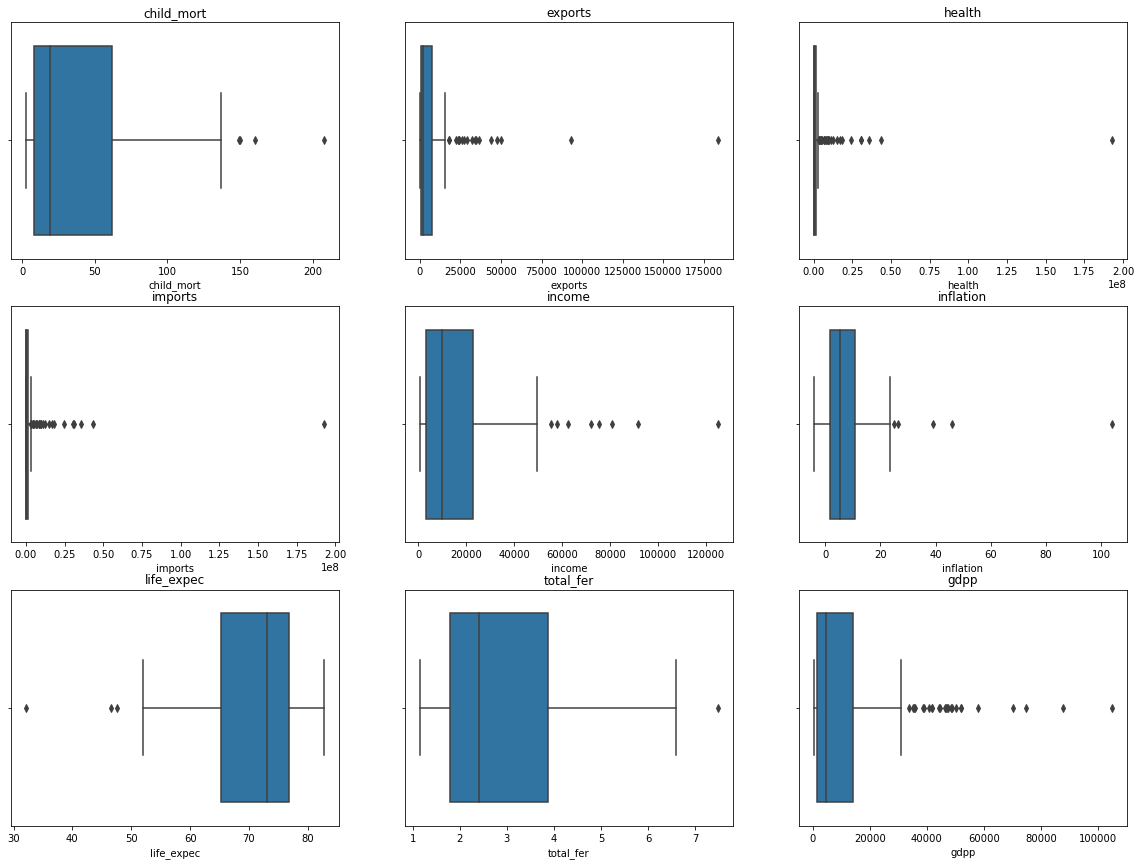

In [176]:
plt.figure(figsize=[20,20])
cols = data.columns
for i in enumerate(cols):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.title(str(i[1]))

From the above "boxplots" it is clearly appealing of outliers, All the variables except *_life_expec_* has outliers towards right side, so lets check the skewness of the data

In [177]:
data.skew()

child_mort     1.450774
exports        6.720171
health        10.254305
imports       10.254305
income         2.231480
inflation      5.154049
life_expec    -0.970996
total_fer      0.967092
gdpp           2.218051
dtype: float64

- As we saw from the above charts there are outliers in almost every feature.
- Each row of the dataset is for one country, removing outliers can lead to loss of crucial data.
- Though, to check wether data outliers can be treated, i tried treating them, but lost lot of important data.
- So, I continue using all the data, as it is important in business understanding perspective.

#### Lets Scale the data

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
from sklearn.preprocessing import RobustScaler

I experimented with a few popular scaling techniques

After trying with variety of scaling Techniques, the normalization to outliers are done fairly with MinMaxScaler

In [181]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
data_scaled.shape

(167, 9)

In [182]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = data.columns
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.000002,0.000002,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.006227,0.000243,0.000243,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.009315,0.000396,0.000396,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.011963,0.000402,0.000402,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.030204,0.003510,0.003510,0.148652,0.052213,0.881657,0.154574,0.114242


### Step 4 : Modelling the data

#### KMeans Clustering

In [183]:
?KMeans

In [227]:
kmeans = KMeans(n_clusters = 4,max_iter=50,init="k-means++",random_state=0)
kmeans.fit_transform(data_scaled)

array([[2.35824665, 0.13570905, 1.78385402, 3.2223617 ],
       [0.12734882, 2.3565113 , 1.14219684, 2.52205171],
       [0.1561849 , 2.31198153, 1.15712667, 2.52548365],
       [2.38826822, 0.23267093, 1.81584085, 3.22861129],
       [0.1185003 , 2.35270823, 1.09449095, 2.46323631],
       [0.14986213, 2.33756935, 1.1201144 , 2.48804026],
       [0.1169835 , 2.34506242, 1.15977293, 2.536728  ],
       [1.12575597, 1.72324818, 0.13261982, 2.05077488],
       [1.12104324, 1.73606656, 0.07704922, 1.99739212],
       [0.14639643, 2.31690973, 1.15658004, 2.51562143],
       [0.22806972, 2.36505721, 1.05400678, 2.39023265],
       [0.2685045 , 2.37125129, 1.0437057 , 2.37089538],
       [0.19112061, 2.29882324, 1.20815748, 2.57186605],
       [0.14483063, 2.36173146, 1.09026131, 2.45421253],
       [0.16934951, 2.35908495, 1.14069637, 2.50630888],
       [1.11159976, 1.70953297, 0.08950142, 1.96650628],
       [0.1170893 , 2.31100368, 1.1658359 , 2.53403619],
       [2.34597178, 0.15005498,

In [228]:
labels = kmeans.labels_
labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

#### Finding the optimal number of customers

#### SSD

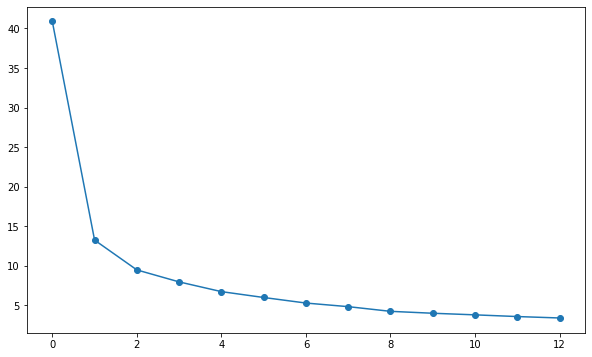

In [229]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,init="k-means++",random_state=0)
    kmeans.fit_transform(data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize=[10,6])
plt.plot(ssd, marker ="o")
plt.show()

From the above elbow-plot it is understandable that optimal number of clusters could be "3", so lets confirm this with "silhouette analysis"

#### Silhouette Analysis

In [230]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,init="k-means++",random_state=0)
    kmeans.fit_transform(data_scaled)
    
    labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7490457151422293
For n_clusters=3, the silhouette score is 0.7706080999530858
For n_clusters=4, the silhouette score is 0.7713916851278259
For n_clusters=5, the silhouette score is 0.5354075251957352
For n_clusters=6, the silhouette score is 0.4025259713638635
For n_clusters=7, the silhouette score is 0.3740656059947124
For n_clusters=8, the silhouette score is 0.36908809015950583


Now let's check the final model with "k=3"
then assign the labels to dataframe

In [231]:
#final_model
kmeans = KMeans(n_clusters = 3, max_iter = 50,init="k-means++",random_state=0)
kmeans.fit_transform(data_scaled)

array([[0.13570905, 2.35824665, 1.81915134],
       [2.3565113 , 0.12734882, 1.16289841],
       [2.31198153, 0.1561849 , 1.17729834],
       [0.23267093, 2.38826822, 1.8497792 ],
       [2.35270823, 0.1185003 , 1.1129788 ],
       [2.33756935, 0.14986213, 1.13926051],
       [2.34506242, 0.1169835 , 1.18069624],
       [1.72324818, 1.12575597, 0.18209177],
       [1.73606656, 1.12104324, 0.11804119],
       [2.31690973, 0.14639643, 1.17599835],
       [2.36505721, 0.22806972, 1.0685692 ],
       [2.37125129, 0.2685045 , 1.05717636],
       [2.29882324, 0.19112061, 1.22923548],
       [2.36173146, 0.14483063, 1.10823276],
       [2.35908495, 0.16934951, 1.16021648],
       [1.70953297, 1.11159976, 0.10675416],
       [2.31100368, 0.1170893 , 1.18621918],
       [0.15005498, 2.34597178, 1.79330782],
       [2.30433342, 0.13986778, 1.20360268],
       [2.28028331, 0.22026146, 1.22908844],
       [2.3797697 , 0.19088479, 1.16152633],
       [2.27423408, 0.36729243, 1.26634297],
       [2.

In [232]:
labels = kmeans.labels_
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

Assigning labels to the Dataframe

In [233]:
data_scaled["cluster_id"] = labels
pd.set_option("display.max_columns",None)
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,0.426485,0.000295,1.529869e-06,1.529869e-06,0.008047,0.126144,0.475345,0.736593,0.003073,0,0
1,0.068160,0.006227,2.427109e-04,2.427109e-04,0.074933,0.080399,0.871795,0.078864,0.036833,1,1
2,0.120253,0.009315,3.958438e-04,3.958438e-04,0.098809,0.187691,0.875740,0.274448,0.040365,1,1
3,0.566699,0.011963,4.023104e-04,4.023104e-04,0.042535,0.245911,0.552268,0.790221,0.031488,0,0
4,0.037488,0.030204,3.510004e-03,3.510004e-03,0.148652,0.052213,0.881657,0.154574,0.114242,1,1
5,0.057936,0.010588,1.039194e-03,1.039194e-03,0.145437,0.232049,0.861933,0.192429,0.096107,1,1
6,0.075463,0.003639,1.117234e-04,1.117234e-04,0.048967,0.110711,0.812623,0.085174,0.028529,1,1
7,0.010711,0.055919,2.764282e-02,2.764282e-02,0.327926,0.049626,0.984221,0.123028,0.493171,2,1
8,0.008277,0.130932,5.848521e-02,5.848521e-02,0.342396,0.046973,0.954635,0.045741,0.445447,2,1
9,0.178189,0.017252,9.598071e-04,9.598071e-04,0.123731,0.166436,0.729783,0.121451,0.053537,1,1


#### Visualization on Cluster_id
chose boxplot to plot

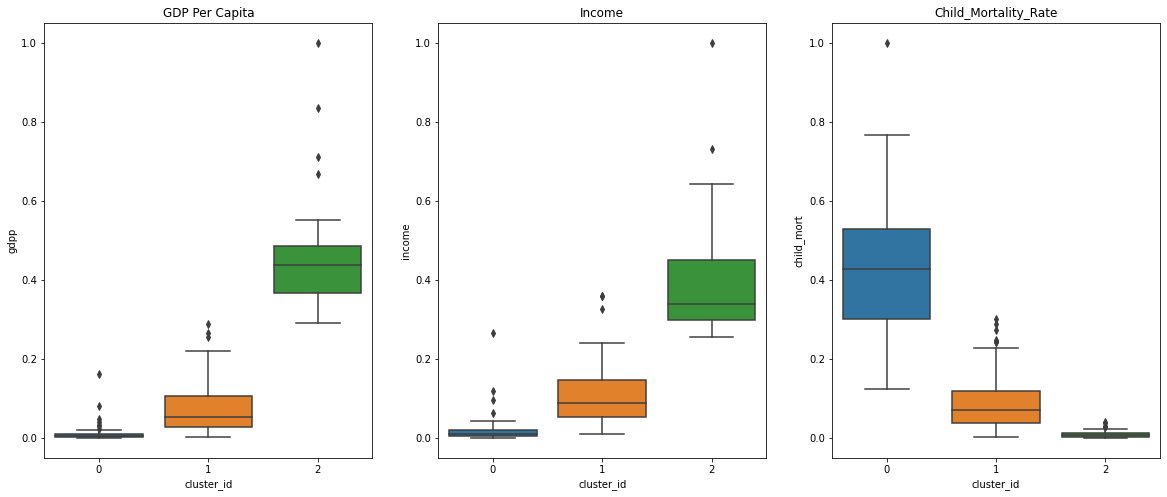

In [234]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='gdpp', data=data_scaled)
plt.title("GDP Per Capita")
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=data_scaled)
plt.title("Income")
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data=data_scaled)
plt.title("Child_Mortality_Rate")
plt.show()

Lets check the same with scatterplot aswell

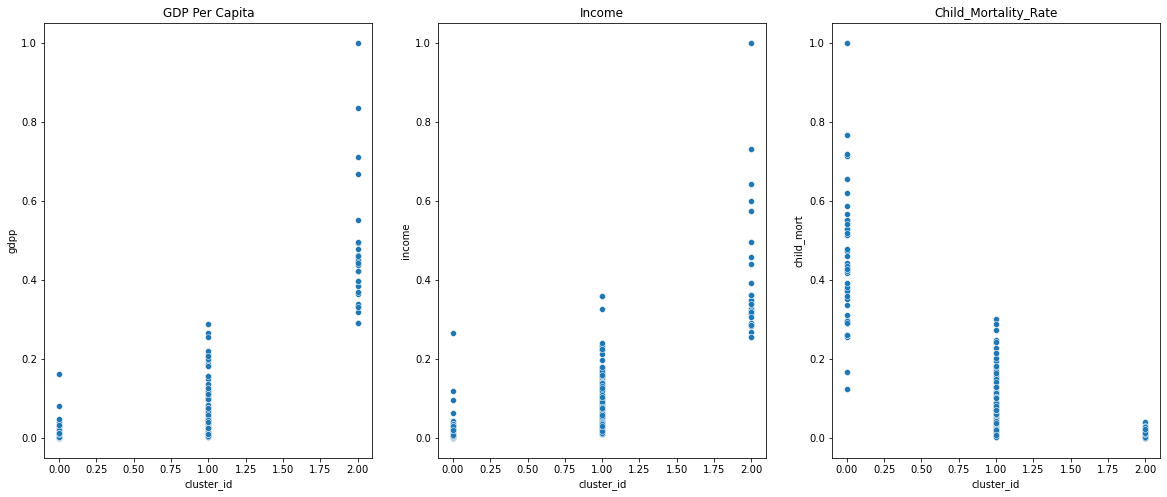

In [235]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.scatterplot(x='cluster_id', y='gdpp', data=data_scaled)
plt.title("GDP Per Capita")
plt.subplot(1,3,2)
sns.scatterplot(x='cluster_id', y='income', data=data_scaled)
plt.title("Income")
plt.subplot(1,3,3)
sns.scatterplot(x='cluster_id', y='child_mort', data=data_scaled)
plt.title("Child_Mortality_Rate")
plt.show()

Insights for the above plots are commented below in the summary part

### Hierarchical Clustering

#### plotting the dendrogram  Firstly  "Single" method, Using euclidean metrics

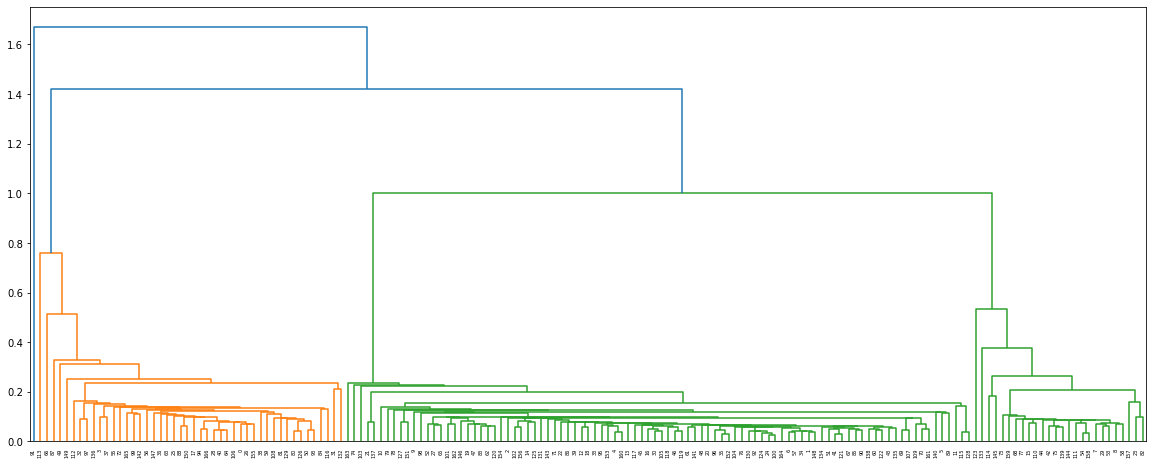

In [236]:
plt.figure(figsize=[20,8])
mergings = linkage(data_scaled,method="single",metric="euclidean")
dendrogram(mergings)
plt.show()

#### Second, Complete method

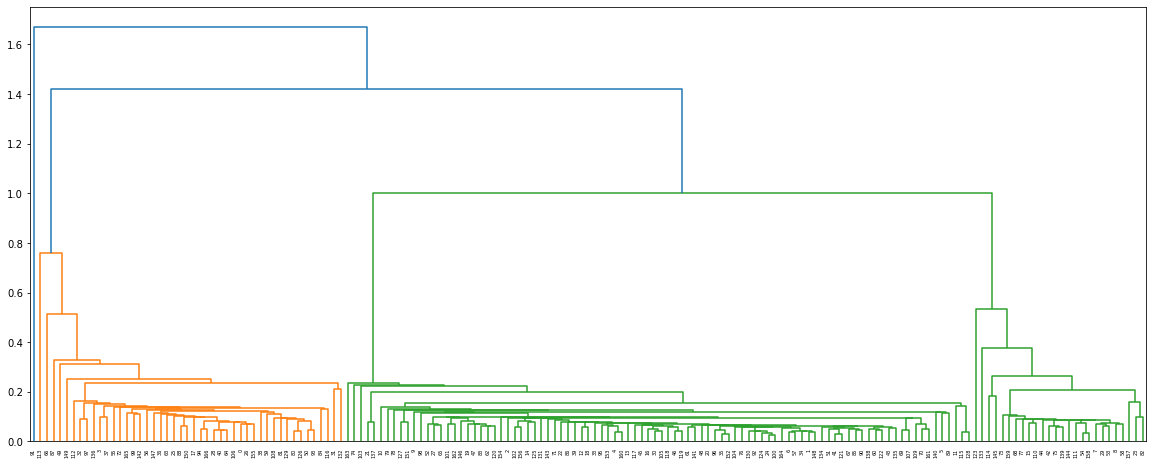

In [237]:
plt.figure(figsize=[20,8])
mergings_1 = linkage(data_scaled,method="complete",metric="euclidean")
dendrogram(mergings)
plt.show()

Cut-tree to cut the dendrogram to get fixed number of clusters

In [238]:
cluster_labels = cut_tree(mergings_1,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

lets assign cluster_labels to dataframe

In [239]:
data_scaled["cluster_labels"] = cluster_labels
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,0.426485,0.000295,0.000002,0.000002,0.008047,0.126144,0.475345,0.736593,0.003073,0,0
1,0.068160,0.006227,0.000243,0.000243,0.074933,0.080399,0.871795,0.078864,0.036833,1,1
2,0.120253,0.009315,0.000396,0.000396,0.098809,0.187691,0.875740,0.274448,0.040365,1,1
3,0.566699,0.011963,0.000402,0.000402,0.042535,0.245911,0.552268,0.790221,0.031488,0,0
4,0.037488,0.030204,0.003510,0.003510,0.148652,0.052213,0.881657,0.154574,0.114242,1,1


In [240]:
?sns.boxplot

<AxesSubplot:xlabel='cluster_labels', ylabel='gdpp'>

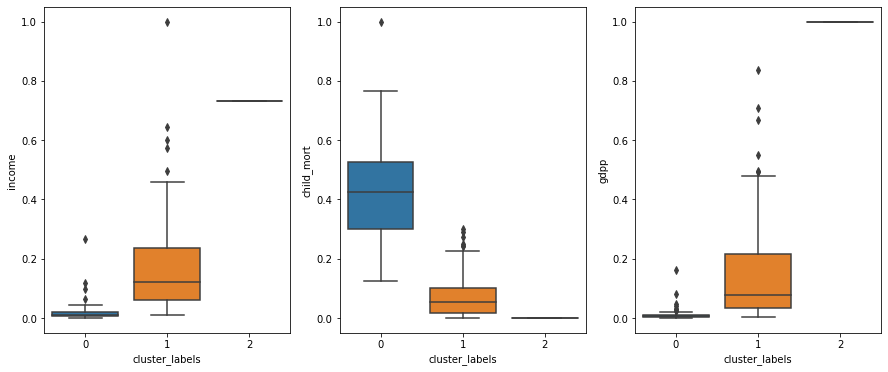

In [241]:
plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='income', data=data_scaled)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='child_mort', data=data_scaled)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=data_scaled)

In [ ]:
?sns.scatterplot

Scatterplots to visualize the clusters that have been formed between the pairs of the variables, comparing the variables (child_mort,gdpp,income)


#### Scatter plot Child_Mort Vs Income

the colour differences show the number of clusters formed by the pointers

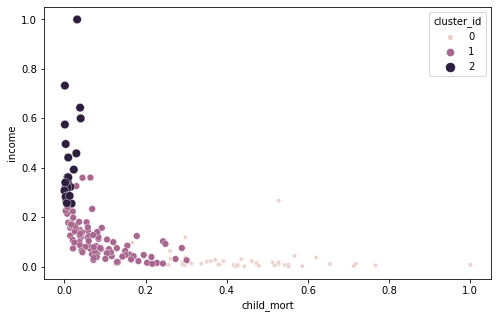

In [242]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=data_scaled,x="child_mort",y="income",hue="cluster_id",size="cluster_id")
plt.show()

#### Scatter plot of GDPP Vs Income

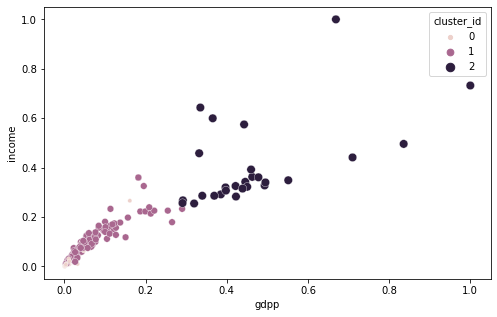

In [244]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=data_scaled,x="gdpp",y="income",hue="cluster_id",size="cluster_id")
plt.show()

#### scatter plot for Child_Mort Vs GDPP

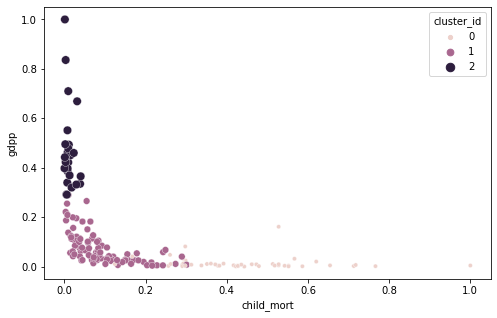

In [243]:
plt.figure(figsize=[8,5])
sns.scatterplot(data=data_scaled,x="child_mort",y="gdpp",hue="cluster_id",size="cluster_id")
plt.show()

#### Summary

From the above plots

cluster 0 = High Mortality rate, Low income and Low GDP

cluster 1 = Average Mortality rate, Average income, Average GDP

cluster 2 = Low Mortality rate, High income, High GDP

#### So, It understandable that when the Child_Mortality of a country is high, the Income and the GDP of the country is poor and vice-versa

From data_scaled dataset, extract cluster columns and assign them to df_data so that we can include country colum to get clear insights

In [245]:
df_data["K_Means_ID"] = data_scaled.cluster_id
df_data["Hierarchical_ID"] = data_scaled.cluster_labels

Let's check the TOP countries which are in cluster_0(details are in summary) and are in dire need

First, lets check in K_means clustering

In [246]:
df_data[df_data.K_Means_ID==0].sort_values(by=["income","gdpp","child_mort"]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_ID,Hierarchical_ID
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0


Hierarchical Clustering countries

In [247]:
df_data[df_data.Hierarchical_ID==0].sort_values(by=["income","gdpp","child_mort"]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_ID,Hierarchical_ID
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0


In [223]:
?pd.set_option

#### From the above two dataframes it is evident that, the most of the countries are similarly assigned in the both the clustering techniques

#### The NGO needs to concentrate on countries of cluster_0, to help which are in dire need.